In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Files to Load
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_df = mouse_drug_data.merge(clinical_trial_data, on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_vol = combined_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
df_mean_tumor_volume = pd.DataFrame(mean_tumor_vol).reset_index()

# Preview DataFrame 
df_mean_tumor_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error_tumor_vol = combined_df.groupby(["Drug", "Timepoint"])['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
df_standard_error_tumor_vol = pd.DataFrame(standard_error_tumor_vol).reset_index()

# Preview DataFrame
df_standard_error_tumor_vol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
df_mean_tumor_volume_reformat = df_mean_tumor_volume.pivot(index='Timepoint', columns='Drug')["Tumor Volume (mm3)"]
df_standard_error_tumor_vol_reformat = df_standard_error_tumor_vol.pivot(index='Timepoint', columns='Drug')["Tumor Volume (mm3)"]

# Preview that Reformatting worked
df_standard_error_tumor_vol_reformat.head()
df_mean_tumor_volume_reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Create list of all drugs
drugs = df_mean_tumor_volume_reformat.columns.tolist()

# Create list of all timepoints
timepoint = df_mean_tumor_volume_reformat.index.tolist()

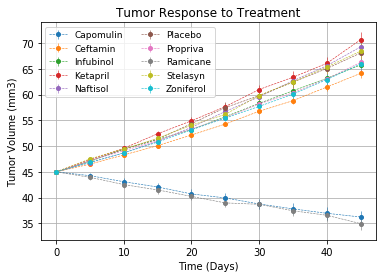

In [6]:
# Generate the Plot (with Error Bars)
for drug in drugs:
    x_axis = timepoint
    y_axis = df_mean_tumor_volume_reformat[drug]
    error = df_standard_error_tumor_vol_reformat[drug]
    plt.errorbar(x_axis, y_axis, yerr=error, label=drug, marker='o', linestyle='--', linewidth=.6, markersize=4)
    
plt.grid()
plt.legend(loc='upper left', prop={'size': 9}, ncol=2)
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")

# Save the Figure
plt.savefig('saved_figs/tumor_response.png')

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_sites = combined_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
df_mean_met_sites = pd.DataFrame(mean_met_sites).reset_index()

# Preview DataFrame
df_mean_met_sites.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standard_error_met_site = combined_df.groupby(["Drug", "Timepoint"])['Metastatic Sites'].sem()

# Convert to DataFrame
df_standard_error_met_site = pd.DataFrame(standard_error_met_site).reset_index()

# Preview DataFrame
df_standard_error_met_site.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
df_mean_met_sites_reformat = df_mean_met_sites.pivot(index='Timepoint', columns='Drug')["Metastatic Sites"]
df_standard_error_met_site_reformat = df_standard_error_met_site.pivot(index='Timepoint', columns='Drug')["Metastatic Sites"]

# Preview that Reformatting worked
df_standard_error_met_site_reformat.head()
df_mean_met_sites_reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


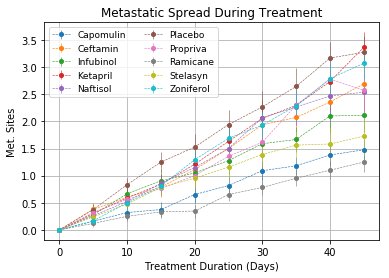

In [10]:
# Generate the Plot (with Error Bars)
for drug in drugs:
    x_axis = timepoint
    y_axis = df_mean_met_sites_reformat[drug]
    error = df_standard_error_met_site_reformat[drug]
    plt.errorbar(x_axis, y_axis, yerr=error, label=drug, marker='o', linestyle='--', linewidth=.6, markersize=4)
    
plt.grid()
plt.legend(loc='upper left', prop={'size': 9}, ncol=2)
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread During Treatment")

# Save the Figure
plt.savefig('saved_figs/metastatic_spread.png')

# Show the Figure
plt.show()

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = combined_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
df_mice_count = pd.DataFrame(mice_count).reset_index()

# Preview DataFrame
df_mice_count.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
df_mice_count_reformat = df_mice_count.pivot(index='Timepoint', columns='Drug')['Mouse ID']

# Preview the Data Frame
df_mice_count_reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


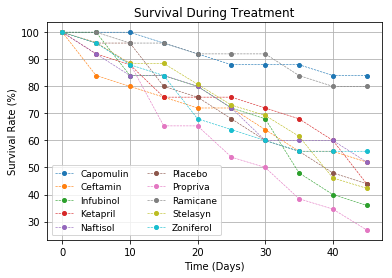

In [13]:
# Generate the Plot (Accounting for percentages)
for drug in drugs:
    x_axis = timepoint
    starting_mouse_count = df_mice_count_reformat.loc[0, drug]
    y_axis = (df_mice_count_reformat[drug]/starting_mouse_count)*100
    plt.plot(x_axis, y_axis, label=drug, marker='o', linestyle='--', linewidth=.6, markersize=4)
    
plt.grid()
plt.legend(loc='bottom left', prop={'size': 9}, ncol=2)
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")

# Save the Figure
plt.savefig('saved_figs/survival.png')

# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
percent_dict = {}

for drug in drugs:
    start = df_mean_tumor_volume_reformat.loc[0, drug]
    end = df_mean_tumor_volume_reformat.loc[45, drug]
    percent_change = (end-start)/start*100
    percent_dict[drug] = percent_change
    
# Display the data to confirm
df_percent_changes = pd.DataFrame(percent_dict.items(), columns=['Drug', 'Percent Change']).set_index('Drug')
df_percent_changes

,Percent Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


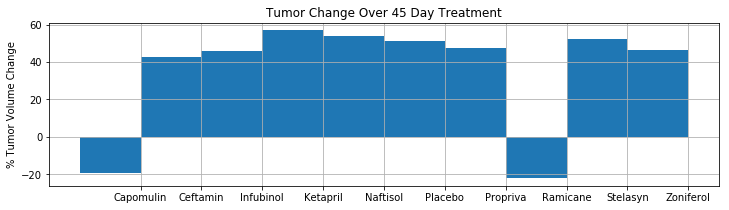

In [16]:
# Store all Relevant Percent Changes into a Tuple
percent_changes = tuple(df_percent_changes['Percent Change'])

# Splice the data between passing and failing drugs

# Orient widths. Add labels, tick marks, etc. 
plt.figure(figsize=(12,3))
plt.bar(x=drugs, height=percent_changes, width=-1, align='edge')

plt.grid()
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")

# Use functions to label the percentages of changes
# https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

# Call functions to implement the function calls


# Save the Figure
plt.savefig('saved_figs/tumor_change.png')

# Show the Figure
plt.show()
